In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from lenstools.statistics.ensemble import Ensemble,Series
from lenstools.statistics.constraints import Emulator
from lenstools.statistics.contours import ContourPlot

/usr/local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


### Constrain a  2 dimensional parameter space $(\alpha,\beta)$ using a 5 dimensional feature $f_i$, sampled at 20 points

#### Generate some fake training data

In [2]:
p = np.outer(np.arange(10.0),np.ones(2))
f = np.outer(np.arange(10.0)+0.1*2,np.ones(5))
emulator = Emulator.from_features(f,p,parameter_index=[r"$\alpha$",r"$\beta$"],feature_index=[r"$f_{0}$".format(n) for n in range(5)])
emulator

parameters         features                        
    $\alpha$ $\beta$    $f_0$ $f_1$ $f_2$ $f_3$ $f_4$
0          0       0      0.2   0.2   0.2   0.2   0.2
1          1       1      1.2   1.2   1.2   1.2   1.2
2          2       2      2.2   2.2   2.2   2.2   2.2
3          3       3      3.2   3.2   3.2   3.2   3.2
4          4       4      4.2   4.2   4.2   4.2   4.2
5          5       5      5.2   5.2   5.2   5.2   5.2
6          6       6      6.2   6.2   6.2   6.2   6.2
7          7       7      7.2   7.2   7.2   7.2   7.2
8          8       8      8.2   8.2   8.2   8.2   8.2
9          9       9      9.2   9.2   9.2   9.2   9.2

#### Generate some fake test feature to fit

In [5]:
test_feature = Series(np.ones(5)*4.0 + 0.05*np.random.randn(5),index=emulator[["features"]].columns)
Ensemble(test_feature).T

features                                        
      $f_0$     $f_1$     $f_2$     $f_3$     $f_4$
0  4.003731  4.012546  4.023949  3.918178  4.023306

#### Assume a trivial covariance matrix

In [6]:
features_covariance = Ensemble(np.eye(5)*0.5,index=test_feature.index,columns=test_feature.index)
features_covariance

features                        
                  $f_0$ $f_1$ $f_2$ $f_3$ $f_4$
features $f_0$      0.5   0.0   0.0   0.0   0.0
         $f_1$      0.0   0.5   0.0   0.0   0.0
         $f_2$      0.0   0.0   0.5   0.0   0.0
         $f_3$      0.0   0.0   0.0   0.5   0.0
         $f_4$      0.0   0.0   0.0   0.0   0.5

#### Train the emulator and fit the test feature for the maximum likelihood parameters

In [7]:
emulator.train()

In [8]:
#Evaluate the score of each of these parameter combinations on the test feature
g = np.arange(0.0,10.0,0.5)
p = np.array(np.meshgrid(g,g,indexing="ij")).reshape(2,400).T
test_parameters = Ensemble(p,columns=emulator.parameter_names)
test_parameters

,$\alpha$,$\beta$
0,0.0,0.0
1,0.0,0.5
2,0.0,1.0
3,0.0,1.5
4,0.0,2.0
5,0.0,2.5
6,0.0,3.0
7,0.0,3.5
8,0.0,4.0
9,0.0,4.5


In [9]:
scores = emulator.score(parameters=test_parameters,observed_feature=test_feature,features_covariance=features_covariance)
scores['features'] = np.exp(-0.5*scores['features'])
scores

,$\alpha$,$\beta$,features
0,0.0,0.0,5.021600e-32
1,0.0,0.5,3.165786e-28
2,0.0,1.0,4.439154e-24
3,0.0,1.5,5.220477e-20
4,0.0,2.0,2.958775e-16
5,0.0,2.5,6.767309e-13
6,0.0,3.0,6.194648e-10
7,0.0,3.5,2.288401e-07
8,0.0,4.0,3.350458e-05
9,0.0,4.5,1.884116e-03


#### Plot the $(\alpha,\beta)$ confidence contours

/usr/local/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/usr/local/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


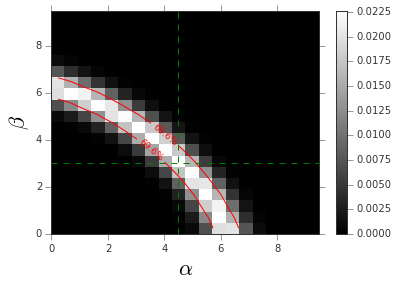

In [10]:
contour = ContourPlot.from_scores(scores,parameters=emulator.parameter_names)
contour.show()
contour.getLikelihoodValues([0.684],precision=0.1)
contour.plotContours(colors=["red"])
contour.labels()